## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [125]:
# Your code here - remember to use markdown cells for comments as well!

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Business Understanding:
Our goal is to predict the sale price of houses using the other columns provided in the data set
We will be using a multivariable linear regression model
This notebook is for technical audiences

Scrub Step

Is the dataset really large?  Do we need a subsample to make things easier and faster for now?

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


I'm going to wait to see if I run into long runtimes with the full dataset before deciding if I need to take a subsample

Dealing with Datatypes:

thankfully we're dealing with mostly numbers
the date is coded as a string (object)
sqft_basement is supposed to be a number but is coded as a string; must be changed
waterfront is probably a dummy variable
there could be some other candidates for transforming the numbers to categorical variables

error trying to convert to float. there is a question mark value that is throwing the error.  Maybe we can convert to float as intended if we transform the ? data to something that can be transformed to a number

In [129]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [130]:
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [131]:
df[df['sqft_basement'] == '?'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656


the other data for rows where sqft_basement is ? seem to be valid data so we can't just disregard 
we can't assume ? was used for those without a basement because we don't know.  can't change ? to 0s because we don't know what the data already stored as 0 truly means.  let's change it to another number like 0 so we know we have this ? data but stored as a 1 so we can convert the datatype to float to be able to make graphical use of the non 0 and 1 data points

In [132]:
df.loc[df['sqft_basement'] == '?', ['sqft_basement']] = '1.0'

In [133]:
df.sqft_basement.value_counts().head()

0.0      12826
1.0        454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [134]:
df.sqft_basement = df.sqft_basement.astype('float64')

In [135]:
df.sqft_basement.dtype

dtype('float64')

In [136]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


maybe floors would be better represented as categorical because of the small number of unique possibilities

In [137]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

no, let's keep as is.  with the inclusion of the 1/2 steps there is enough data points to make sense of this as a continuous variable

In [138]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [139]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [140]:
df.waterfront.isna().sum()

2376

waterfront is a dummy variable we need to cast to a string

In [141]:
df.waterfront.dtype

dtype('float64')

In [142]:
df.waterfront = df.waterfront.astype('str')

In [143]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [144]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

this is a strange variable.  it's supposed to be how many times the house has been viewed but it's values only go up to 4.  doesn't really make sense.  Maybe the column was described wrong.  I guess it's just better to keep this column intact and as a continuous variable

In [145]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,nan,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [146]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [147]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


we aren't going to change anymore columns to categorical so let's now move onto dealing with null values

only 2 columns have null data: view and yr_renovated

we already saw this was a strange variable, we don't really even know what the non-null values mean, but let's see how many null values there are

In [149]:
df.view.isna().sum()

63

there aren't many null values, the vast majority of this column's values are 0.  often times null and 0 represent the same thing.  I think we should just change the NaN to 0

In [150]:
df.loc[df.view.isna(), 'view'] = 0.0

In [151]:
df.view.unique()

array([0., 3., 4., 2., 1.])

In [152]:
df.waterfront.unique()

array(['nan', '0.0', '1.0'], dtype=object)

In [153]:
df.waterfront.value_counts()

0.0    19075
nan     2376
1.0      146
Name: waterfront, dtype: int64

Now I remember we encountered null values in the waterfront variable before we converted the whole thing to a string.  should we transform the null values to 0 since they both easily could represent that the house is not waterfront property.  or  keep the null values as a separate category for a 3 category dummy variable

In [154]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [155]:
df.yr_renovated.value_counts().head(10)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_renovated, dtype: int64

In [156]:
df.yr_renovated.isna().sum()

3842

the 0 value is probably already a placeholder for homes that have never been renovated.  17000 rows have a 0 value so we are just going to change the null values to 0, because at the end of the day, if we don't know what year it was renovated then it is of no use to us in this column besides being something other than a year of renovation

In [157]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [158]:
df.yr_renovated.isna().sum()

0

In [159]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,nan,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


since there are no technically null values in the dataset value_counts will show us if there are numerical values masquerading as null values

In [160]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.737602,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.806196,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [161]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

zipcodes are really more like categories because higher and lower numbers as your zipcode doesn't really tell you anything.  but a 70 category variable seems like a bad idea

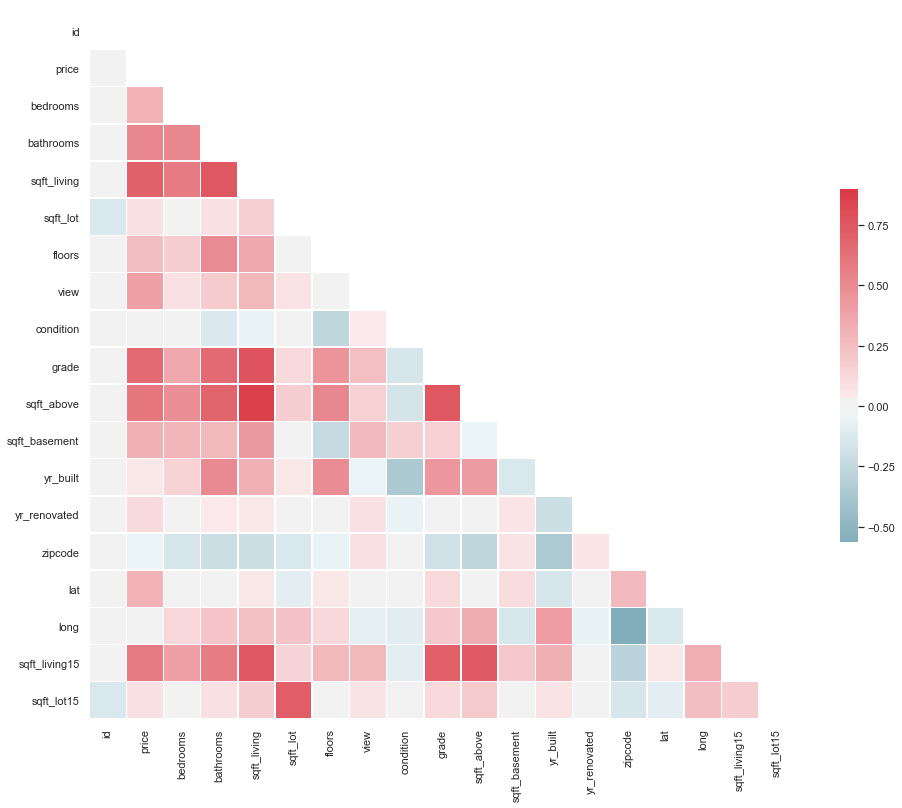

In [162]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [163]:
(abs(df.corr()) > 0.76).sum()

id               1
price            1
bedrooms         1
bathrooms        1
sqft_living      3
sqft_lot         1
floors           1
view             1
condition        1
grade            2
sqft_above       2
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

In [164]:
(abs(df.corr()) > 0.76)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Multicollinearity above .76 (abs)

sqft_living
-grade
-sqft_above


the column sqft_living is highly correlated with both grade and sqft_above.  Given that sqft_above seems like it's capturing similiar info, I think we should remove sqft_living.  I didn't want to get rid of grade because I'm interested to include that in the model

In [165]:
df = df.drop('sqft_living', axis=1)

Normalize our Data

In [ ]:
df.Size = (df.Size - df.Size.mean()) / df.Size.std()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [95]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [97]:
df.bedrooms = (df.bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.floors = (df.floors - df.floors.mean()) / df.floors.std()
df.view = (df.view - df.view.mean()) / df.view.std()
df.condition = (df.condition - df.condition.mean()) / df.condition.std()
df.grade = (df.grade - df.grade.mean()) / df.grade.std()
df.sqft_above = (df.sqft_above - df.sqft_above.mean()) / df.sqft_above.std()
df.sqft_basement = (df.sqft_basement - df.sqft_basement.mean()) / df.sqft_basement.std()
df.yr_built = (df.yr_built - df.yr_built.mean()) / df.yr_built.std()
df.yr_renovated = (df.yr_renovated - df.yr_renovated.mean()) / df.yr_renovated.std()
df.zipcode = (df.zipcode - df.zipcode.mean()) / df.zipcode.std()
df.lat = (df.lat - df.lat.mean()) / df.lat.std()
df.long = (df.long - df.long.mean()) / df.long.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()

In [99]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,-0.402894,-1.451039,-0.228177,-0.915531,nan,-0.304942,-0.629972,-0.560787,-0.735234,-0.649690,-0.544665,-0.188877,1.869602,-0.352886,-0.305688,-0.943654,-0.260621
1,6414100192,12/9/2014,538000.0,-0.402894,0.174482,-0.189735,0.937409,0.0,-0.304942,-0.629972,-0.560787,0.460766,0.259802,-0.680835,5.280340,0.879190,1.161349,-0.746268,-0.432877,-0.187695
2,5631500400,2/25/2015,180000.0,-1.482459,-1.451039,-0.123137,-0.915531,0.0,-0.304942,-0.629972,-1.413157,-1.230546,-0.649690,-1.293596,-0.188877,-0.933451,1.283325,-0.135141,1.070267,-0.172186
3,2487200875,12/9/2014,604000.0,0.676671,1.149794,-0.243873,-0.915531,0.0,-0.304942,2.444371,-0.560787,-0.892284,1.419403,-0.204243,-0.188877,1.084747,-0.283598,-1.272122,-0.914467,-0.284453
4,1954400510,2/18/2015,510000.0,-0.402894,-0.150622,-0.169499,-0.915531,0.0,-0.304942,-0.629972,0.291583,-0.131194,-0.649690,0.544688,-0.188877,-0.073848,0.409284,1.200812,-0.272347,-0.192682


One-Hot
only column to transform is waterfront
but date is also an object and will be treated like a category, not what we want

In [233]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [234]:
df = pd.get_dummies(df)

Exploratory Data Analysis

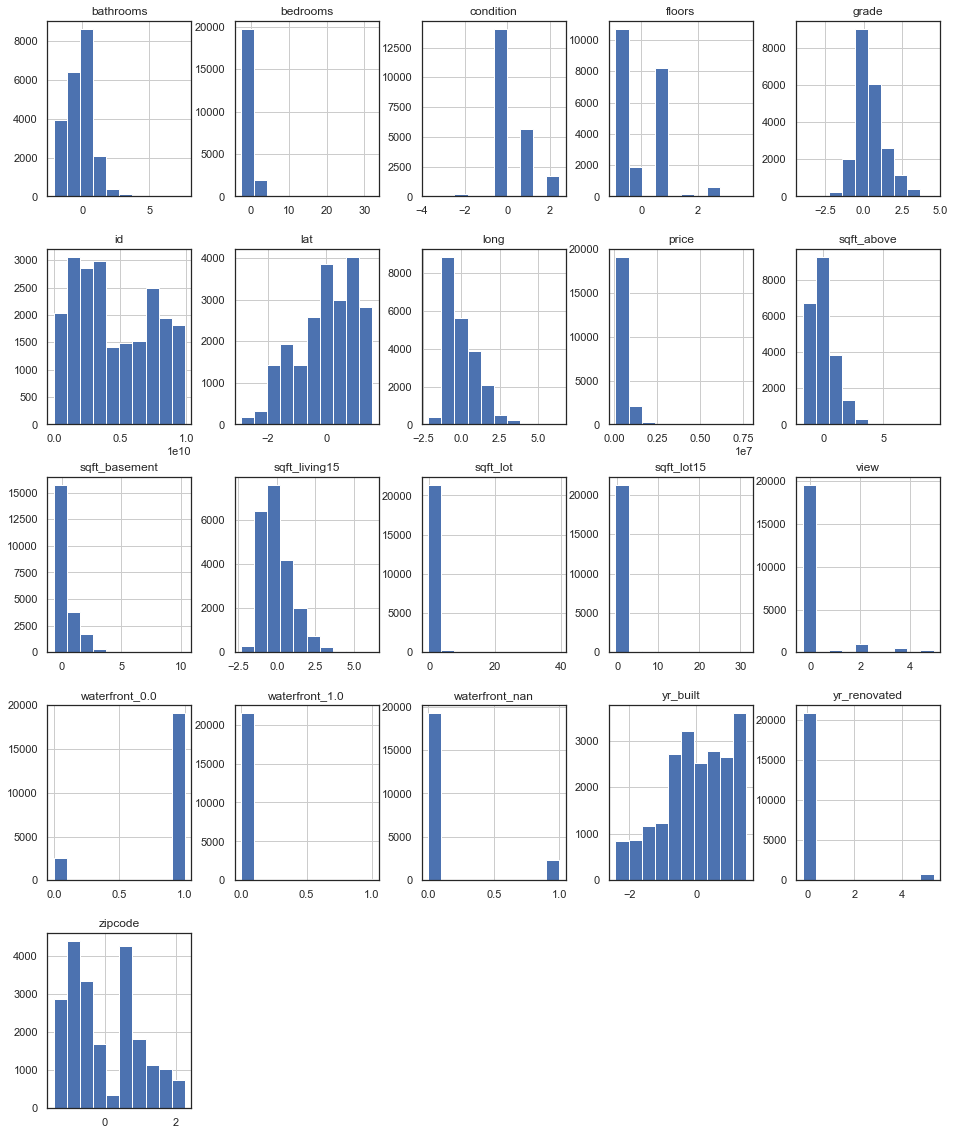

In [110]:
df.hist(figsize=(16,20));

normality check
bathrooms- pretty good


In [111]:
df.bedrooms.describe()

count    2.159700e+04
mean    -2.303005e-16
std      1.000000e+00
min     -2.562024e+00
25%     -4.028937e-01
50%     -4.028937e-01
75%      6.766715e-01
max      3.198406e+01
Name: bedrooms, dtype: float64

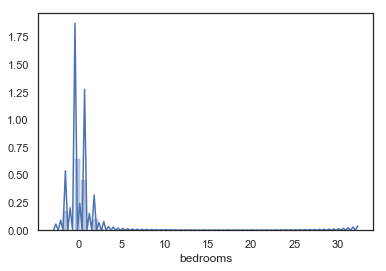

In [112]:
sns.distplot(df.bedrooms)

bedrooms actually looks okay except for some crazy outlier data above 30 edit: just one point

In [113]:
df.bedrooms.value_counts()

-0.402894     9824
 0.676671     6882
-1.482459     2760
 1.756237     1601
 2.835802      272
-2.562024      196
 3.915367       38
 4.994932       13
 6.074497        6
 7.154062        3
 8.233627        1
 31.984061       1
Name: bedrooms, dtype: int64

In [ ]:
condition

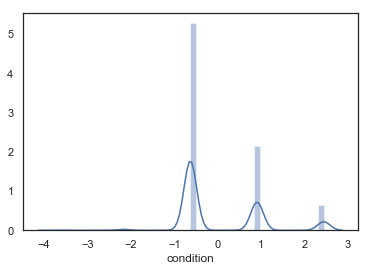

In [114]:
sns.distplot(df.condition)

not terrible.  the negative tail is extremely shallow

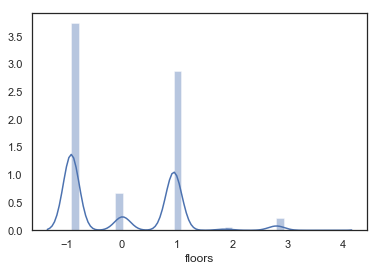

In [115]:
sns.distplot(df.floors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B87890FD0>]],
      dtype=object)

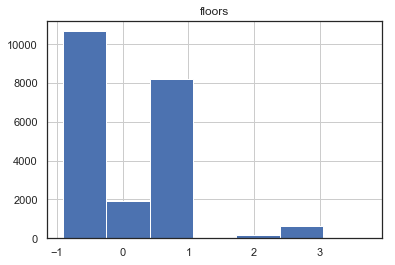

In [124]:
df.hist('floors', bins=7)

I don't like trying to explore the data after it has already been normalized.  imo that takes away some of the intuition this step is supposed to provide.  I will now redo the EDA with the dataset pre normalized

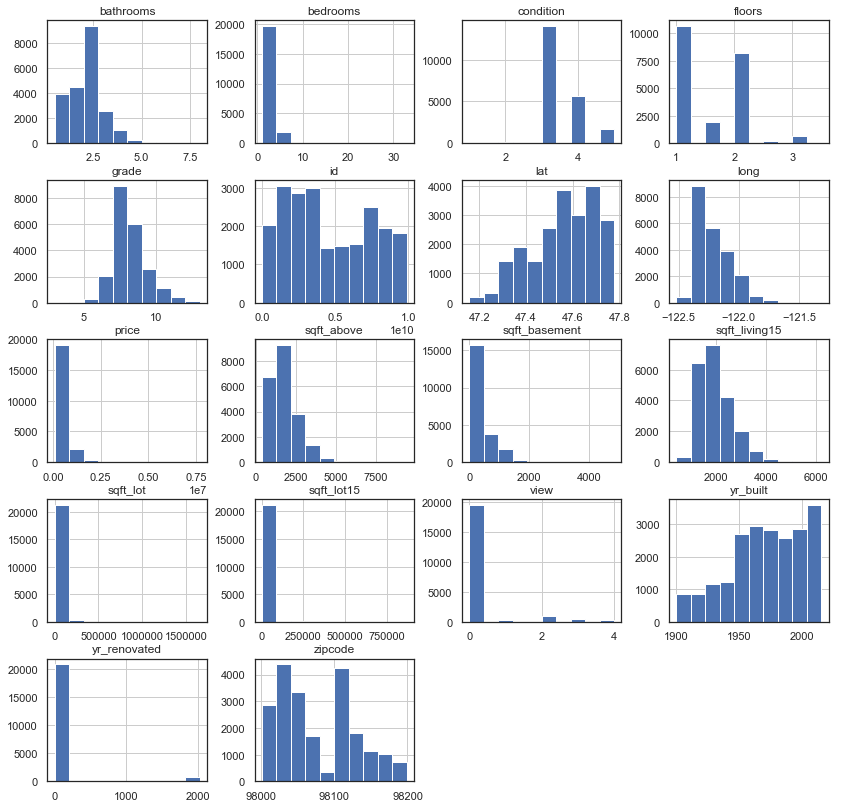

In [167]:
df.hist(figsize=(14,14));

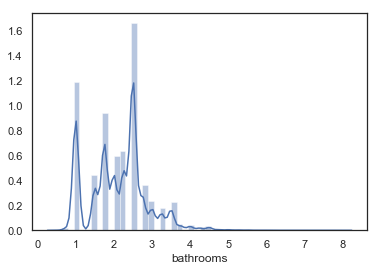

In [168]:
sns.distplot(df.bathrooms)

In [169]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

it seems kinda strange there are so many houses with just one bathroom.  must be a lot of small and/or old houses in king's county

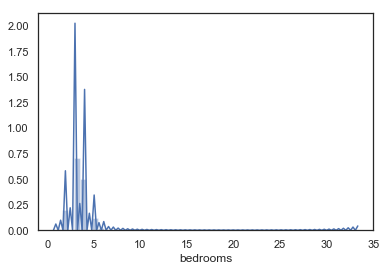

In [170]:
sns.distplot(df.bedrooms)

In [171]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

1 house having 33 bedrooms is an insane outlier.  that must be some sort of mistake, maybe that place was less a house and more of some sort of public building

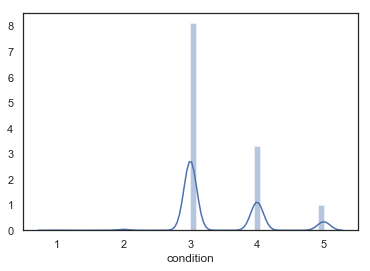

In [172]:
sns.distplot(df.condition)

In [173]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

not terrible.  but the negative tail is extremely shallow

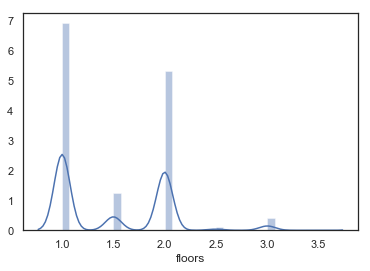

In [174]:
sns.distplot(df.floors)

floors- not very normal.  very positively skewed and with a second peak at 2

In [232]:
df.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

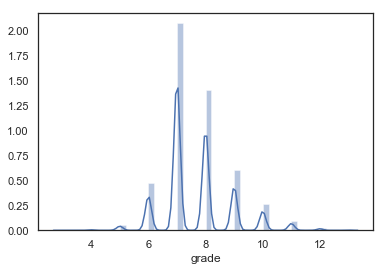

In [175]:
sns.distplot(df.grade)

grade- good.  the positive tail is much thicker than the negative tail.  making the distribution less symmetrical

In [176]:
df.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

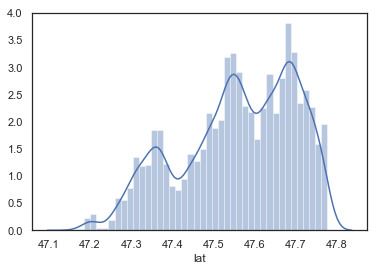

In [177]:
sns.distplot(df.lat)

lat- decent.  negative skew, sharp cutoff after peak to the positive side

In [178]:
df.lat.describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

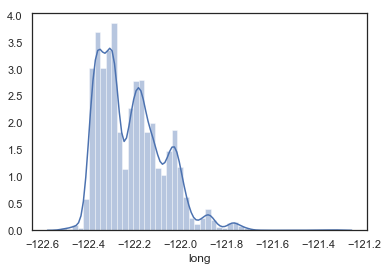

In [179]:
sns.distplot(df.long)

long- pretty good.  just some positive skew.  edit-actually not great. still passable though

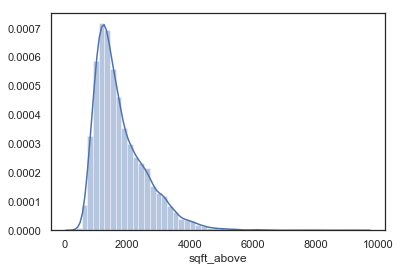

In [180]:
sns.distplot(df.sqft_above)

sqft_above- pretty good.  just some positive skew

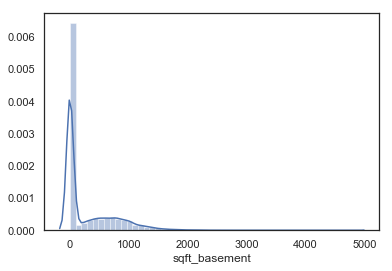

In [181]:
sns.distplot(df.sqft_basement)

sqft_basement.  not great.  but it's because of the data, the 0s and 1s are just telling us either houses don't have basements or we don't know for some reason.  for the basement data that does exist, it seems normally distributed

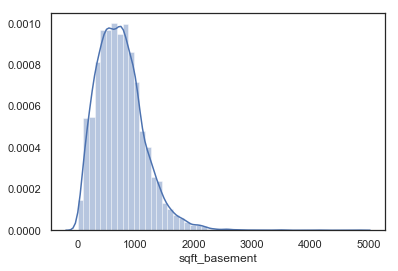

In [184]:
sns.distplot(df.loc[df.sqft_basement > 2, 'sqft_basement'])

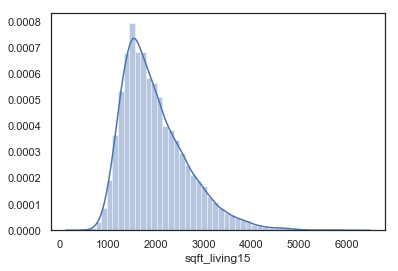

In [185]:
sns.distplot(df.sqft_living15)

In [ ]:
sqft_living15- pretty good, positive skew

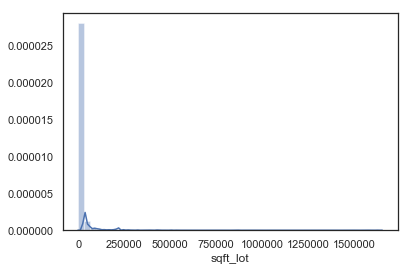

In [186]:
sns.distplot(df.sqft_lot)

In [197]:
df.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [201]:
df.loc[df.sqft_lot > 800000, 'sqft_lot'].value_counts()

871200     2
1651359    1
843309     1
920423     1
1074218    1
1164794    1
982278     1
982998     1
881654     1
1024068    1
Name: sqft_lot, dtype: int64

there are a few crazy outliers causing the extreme skew

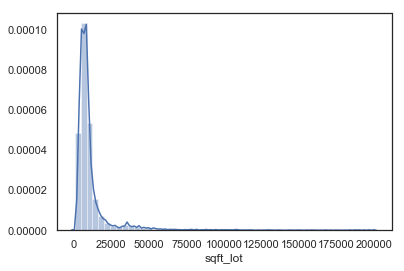

In [204]:
sns.distplot(df.loc[df.sqft_lot < 200000, 'sqft_lot'])

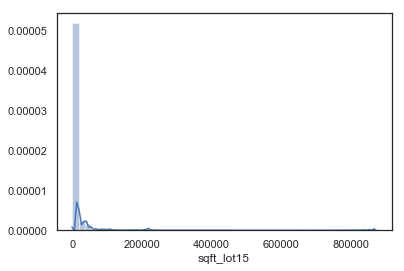

In [205]:
sns.distplot(df.sqft_lot15)

In [207]:
df.sqft_lot15.describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

sqft_lot15; extreme skew again

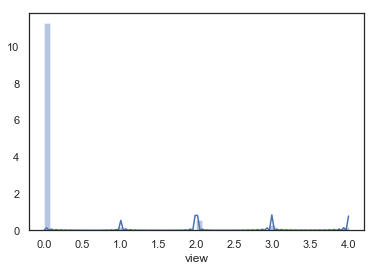

In [208]:
sns.distplot(df.view)

view- not good.  positive skew

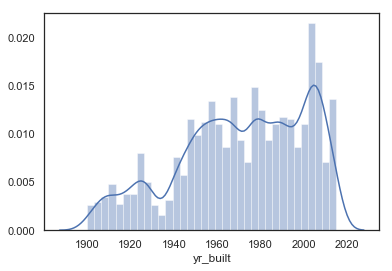

In [209]:
sns.distplot(df.yr_built)

yr_built- not terrible. negative skew

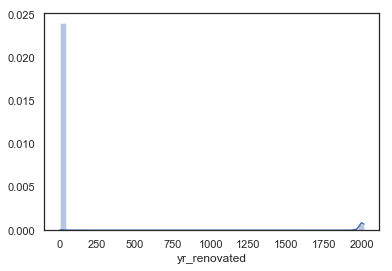

In [210]:
sns.distplot(df.yr_renovated)

In [211]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

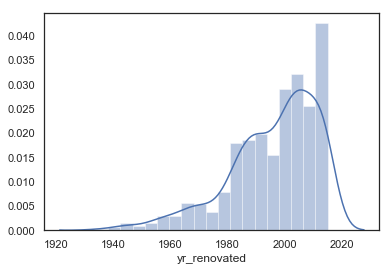

In [212]:
sns.distplot(df.loc[df.yr_renovated > 1, 'yr_renovated'])

yr_renovated- not good, crazy skew.  this really isn't a continuous variable with almost all values being 0 (null)

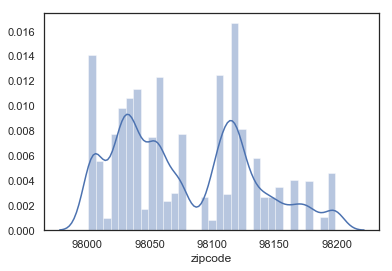

In [213]:
sns.distplot(df.zipcode)

zipcode- not good

LINEARITY CHECKS

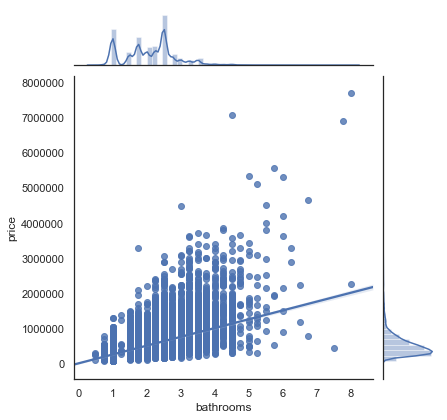

In [214]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')

looks okay

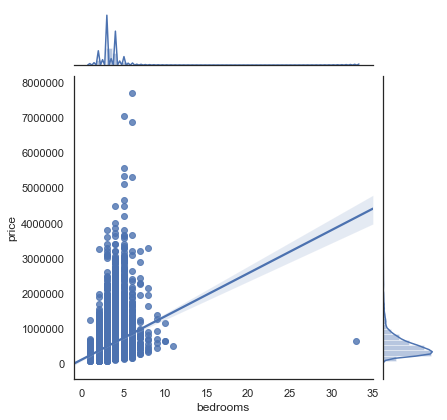

In [215]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')

even without the crazy outlier, doesn't look to be very linear, not awful though but I thought it would be moreso.  it actually looks more parabolic than linear

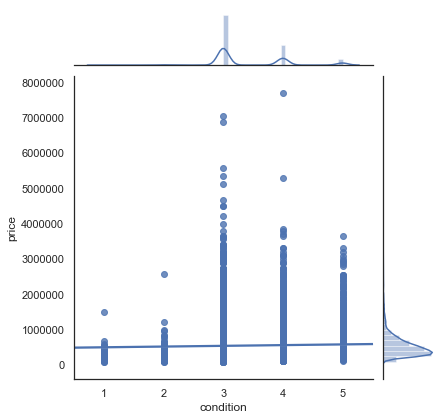

In [216]:
sns.jointplot(x='condition', y='price', data=df, kind='reg')

not continuous, shouldn't have made this plot. does still appear to be slightly positive linear relationship

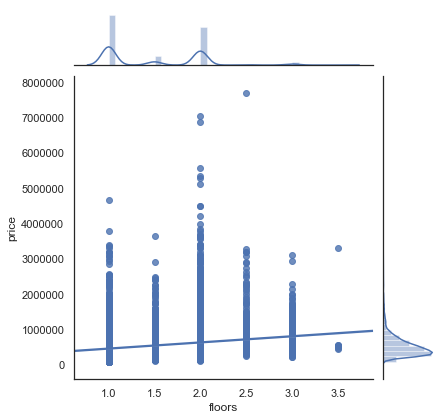

In [217]:
sns.jointplot(x='floors', y='price', data=df, kind='reg')

not great, passable though I think

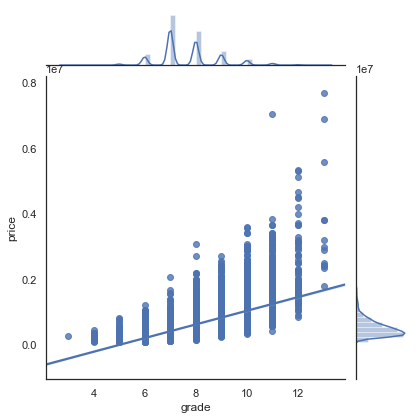

In [218]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

looks okay

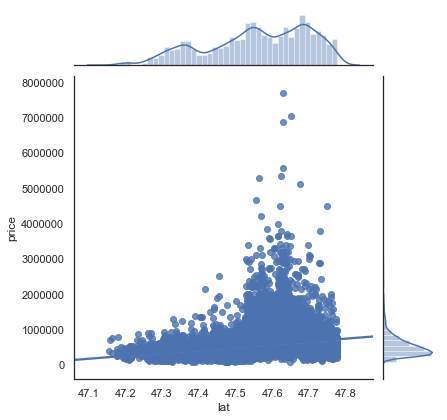

In [219]:
sns.jointplot(x='lat', y='price', data=df, kind='reg')

passable

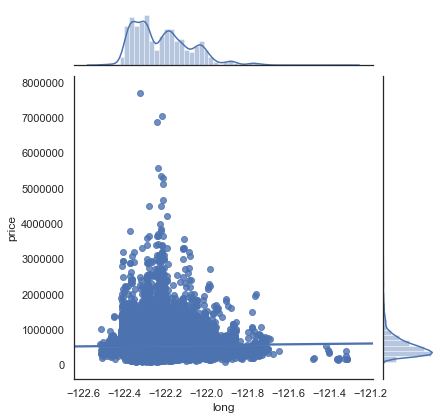

In [220]:
sns.jointplot(x='long', y='price', data=df, kind='reg')

idk. doesn't seem to be much of a relationship

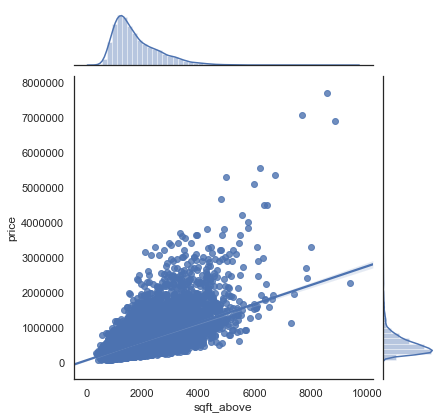

In [221]:
sns.jointplot(x='sqft_above', y='price', data=df, kind='reg')

looks good

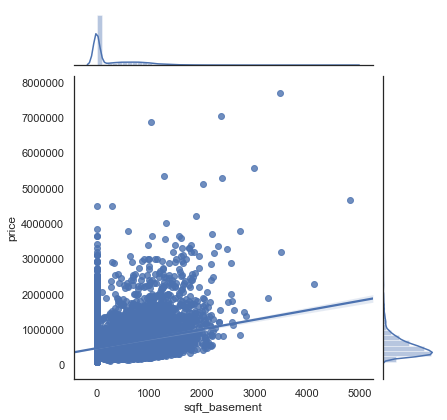

In [222]:
sns.jointplot(x='sqft_basement', y='price', data=df, kind='reg')

passable

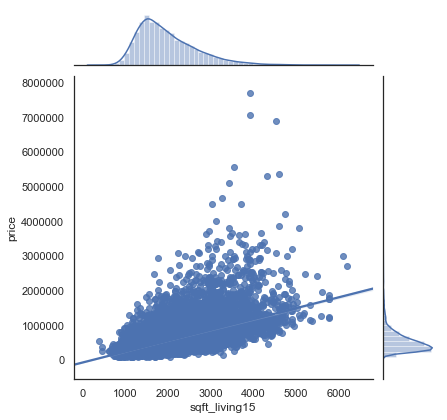

In [223]:
sns.jointplot(x='sqft_living15', y='price', data=df, kind='reg')

looks good

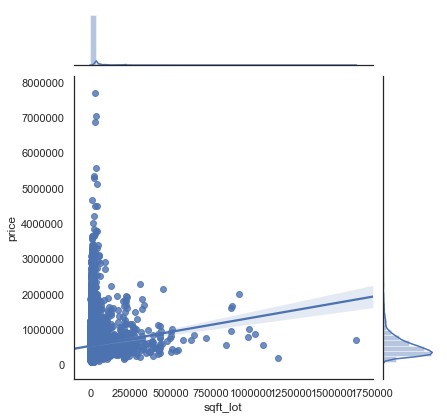

In [225]:
sns.jointplot(x='sqft_lot', y='price', data=df, kind='reg')

In [ ]:
idk

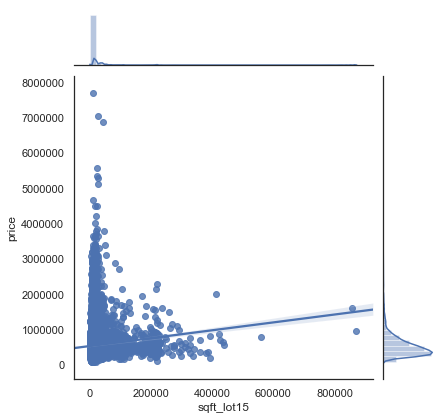

In [226]:
sns.jointplot(x='sqft_lot15', y='price', data=df, kind='reg')

idk

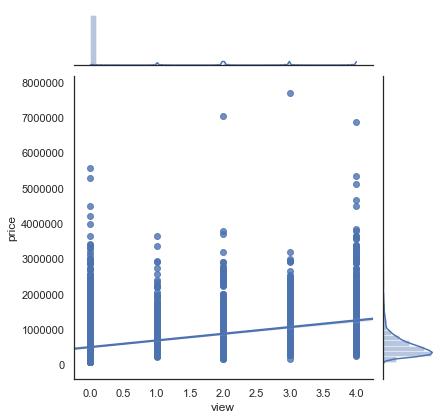

In [227]:
sns.jointplot(x='view', y='price', data=df, kind='reg')

not really continuous

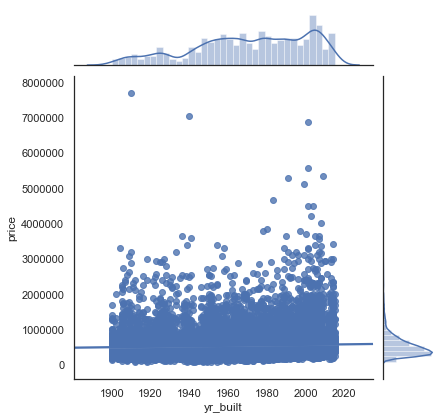

In [228]:
sns.jointplot(x='yr_built', y='price', data=df, kind='reg')

passable I think

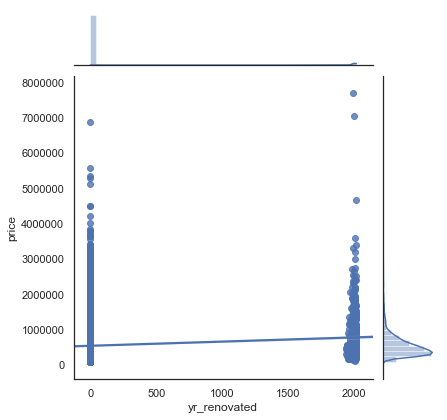

In [229]:
sns.jointplot(x='yr_renovated', y='price', data=df, kind='reg')

unreadable with the data as is

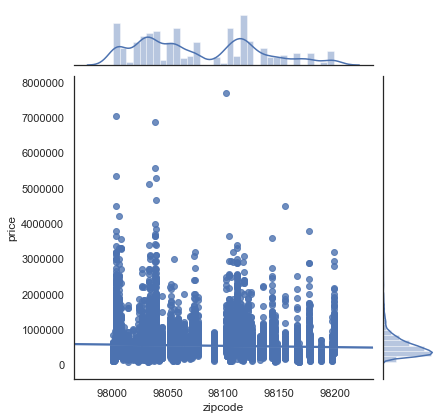

In [230]:
sns.jointplot(x='zipcode', y='price', data=df, kind='reg')

doesn't seem linear

Let's now recheck whether some variables should be altered or thrown out because they don't pass the assumptions needed to be fit to be included in our modeling later on

In [231]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


bathrooms- YES
    normality- ok
    linearity- ok
bedrooms- NO
    normality- NOT okay
    linearity- NOT okay
condition- YES
    normality- ok
    linearity- ok
floors- BARELY Yes
    normality- ok
    linearity- ok
grade- YES
    normality- ok
    linearity- ok
lat- slight Yes
    normality- ok
    linearity- ok
long- no
    normality- not great
    linearity- none
sqft_above- Yes
    normality- ok
    linearity- ok
*sqft_basement- 
    normality- ok
    linearity- ok
sqft_living15- Yep
    normality- ok
    linearity- ok
sqft_lot- take it or leave it
    normality- bad skew because of outliers
    linearity- not good
sqft_lot15- if you take this one, don't take previous
    normality- bad skew
    linearity- maybe passable
view- keep
    normality- not good
    linearity- ok
yr_built- No
    normality- maybe passable 
    linearity- no 
*yr_renovated- 
    normality- ok
    linearity- ok
zip- no
    normality- not good
    linearity- not good



yr_renovated needs be changed because over 20,000 of it's values are 0.  that leaves the few actual years that are recorded practically useless because all plots and descriptive analysis are ruined by the skewness of all the 0 values.  To still be able to get some information out of this column, I think we should change this to a dummy variable basically saying whether the house has been renovated or not.  so we'll leave all the 0 values as 0 as they represent not rennovated and then we'll change all the non-zero values to 1 to represent renovated.  then we'll get dummies()

In [247]:
df.yr_renovated.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'yr_renovated'

In [240]:
df.loc[df.yr_renovated > 0.0, 'yr_renovated'] = 1.0

In [241]:
df.yr_renovated.value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

In [242]:
df.yr_renovated = df.yr_renovated.astype('str')

In [244]:
df.yr_renovated.dtype

dtype('O')

In [245]:
df = pd.get_dummies(df)

In [246]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,0,0,1,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,1,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,1,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,1,0,0,1,0


In [248]:
df.sqft_basement.describe()

count    21597.000000
mean       285.737602
std        439.806196
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

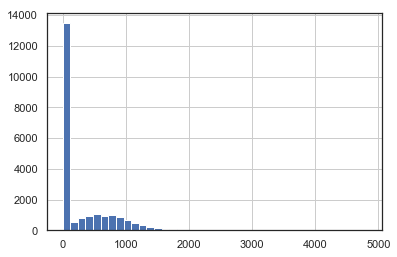

In [252]:
df.sqft_basement.hist(bins=40)

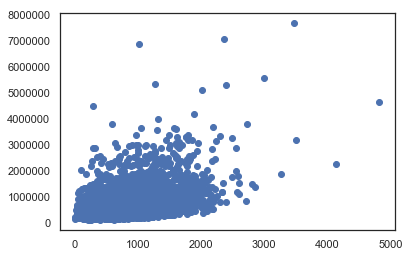

In [257]:
plt.scatter(df.loc[df.sqft_basement > 1, 'sqft_basement'], df.loc[df.sqft_basement > 1, 'price'])
plt.show()

I think we should do the same thing we just did with yr_renovated to sqft_basement.  1/2 the values are 0 which would skew the data too much to be useful as a continuous variable.  We can just change the variable to either has a basemenet or doesn't have a basement and see if that affects price.  but first we need to change the manufactured 1 values to 0s because they will go into the no basemenet category too.  then we will change all values > 0 to 1 and then change to type string and then to a dummy variable format

In [259]:
df.sqft_basement.value_counts().head()

0.0      12826
1.0        454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [261]:
df.loc[df.sqft_basement == 1.0, 'sqft_basement'] = 0.0

In [263]:
df.loc[df.sqft_basement > 1.0, 'sqft_basement'] = 1.0

In [264]:
df.sqft_basement.value_counts()

0.0    13280
1.0     8317
Name: sqft_basement, dtype: int64

In [265]:
df.sqft_basement = df.sqft_basement.astype('str')

In [266]:
df = pd.get_dummies(df)

In [267]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,...,long,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,3,7,...,-122.257,1340,5650,0,0,1,1,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,3,7,...,-122.319,1690,7639,1,0,0,0,1,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,3,6,...,-122.233,2720,8062,1,0,0,1,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,5,7,...,-122.393,1360,5000,1,0,0,1,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,3,8,...,-122.045,1800,7503,1,0,0,1,0,1,0


okay, time to remove the variables that fail the assumptions too badly
bedrooms, long, yr_built, zipcode

In [269]:
df = df.drop(['bedrooms', 'long', 'yr_built', 'zipcode'], axis=1)

In [270]:
df.head()

,id,date,price,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,7129300520,2014-10-13,221900.0,1.00,5650,1.0,0.0,3,7,1180,47.5112,1340,5650,0,0,1,1,0,1,0
1,6414100192,2014-12-09,538000.0,2.25,7242,2.0,0.0,3,7,2170,47.7210,1690,7639,1,0,0,0,1,0,1
2,5631500400,2015-02-25,180000.0,1.00,10000,1.0,0.0,3,6,770,47.7379,2720,8062,1,0,0,1,0,1,0
3,2487200875,2014-12-09,604000.0,3.00,5000,1.0,0.0,5,7,1050,47.5208,1360,5000,1,0,0,1,0,0,1
4,1954400510,2015-02-18,510000.0,2.00,8080,1.0,0.0,3,8,1680,47.6168,1800,7503,1,0,0,1,0,1,0


In [273]:
predictors = df.loc[:, df.drop(['id', 'date', 'price'], axis=1).columns]

Modeling

Initial model

In [275]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2982.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        15:19:24   Log-Likelihood:            -2.9577e+05
No. Observations:               21597   AIC:                         5.916e+05
Df Residuals:                   21582   BIC:                         5.917e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -1.39e+07   2.21e+05    -62.987      0.000   -1.43e+07   -1.35e+07
bathrooms          8702.7874   3116.859      2.792      0.005    2593.514    1.48e+04
sqft_lot              0.1546      0.051      3.037      0.002       0.055       0.254
floors            -3.779e+04   3614.206    -10.456      0.000   -4.49e+04   -3.07e+04
view               7.347e+04   2195.224     33.469      0.000    6.92e+04    7.78e+04
condition          6.338e+04   2343.748     27.042      0.000    5.88e+04     6.8e+04
grade              9.223e+04   2211.497     41.703      0.000    8.79e+04    9.66e+04
sqft_above          169.4622      3.748     45.215      0.000     162.116     176.808
lat                 6.73e+05   1.09e+04     62.013      0.000    6.52e+05    6.94e+05
sqft_living15        22.7868      3.544      6.429      0.000      15.840      29.734
sqft_lot15           -0.5079      0.078     -6.535      0.000      -0.660      -0.356
waterfront_0.0    -4.842e+06   7.38e+04    -65.595      0.000   -4.99e+06    -4.7e+06
waterfront_1.0    -4.207e+06   7.47e+04    -56.333      0.000   -4.35e+06   -4.06e+06
waterfront_nan    -4.847e+06   7.39e+04    -65.600      0.000   -4.99e+06    -4.7e+06
yr_renovated_0.0  -7.022e+06    1.1e+05    -63.696      0.000   -7.24e+06   -6.81e+06
yr_renovated_1.0  -6.874e+06   1.11e+05    -62.196      0.000   -7.09e+06   -6.66e+06
sqft_basement_0.0     -7e+06    1.1e+05    -63.591      0.000   -7.22e+06   -6.78e+06
sqft_basement_1.0 -6.896e+06   1.11e+05    -62.367      0.000   -7.11e+06   -6.68e+06
==============================================================================
Omnibus:                    19562.433   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2230114.436
Skew:                           3.930   Prob(JB):                         0.00
Kurtosis:                      52.158   Cond. No.                     4.85e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

oops. forgot to re-scale the variables after I changed them back to their original units for ease of understanding the data during scrubbing

In [276]:
df.columns

Index(['id', 'date', 'price', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'lat', 'sqft_living15',
       'sqft_lot15', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan',
       'yr_renovated_0.0', 'yr_renovated_1.0', 'sqft_basement_0.0',
       'sqft_basement_1.0'],
      dtype='object')

In [277]:

df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.floors = (df.floors - df.floors.mean()) / df.floors.std()
df.view = (df.view - df.view.mean()) / df.view.std()
df.condition = (df.condition - df.condition.mean()) / df.condition.std()
df.grade = (df.grade - df.grade.mean()) / df.grade.std()
df.sqft_above = (df.sqft_above - df.sqft_above.mean()) / df.sqft_above.std()




df.lat = (df.lat - df.lat.mean()) / df.lat.std()

df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()

In [278]:
df.head()

,id,date,price,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,7129300520,2014-10-13,221900.0,-1.451039,-0.228177,-0.915531,-0.304942,-0.629972,-0.560787,-0.735234,-0.352886,-0.943654,-0.260621,0,0,1,1,0,1,0
1,6414100192,2014-12-09,538000.0,0.174482,-0.189735,0.937409,-0.304942,-0.629972,-0.560787,0.460766,1.161349,-0.432877,-0.187695,1,0,0,0,1,0,1
2,5631500400,2015-02-25,180000.0,-1.451039,-0.123137,-0.915531,-0.304942,-0.629972,-1.413157,-1.230546,1.283325,1.070267,-0.172186,1,0,0,1,0,1,0
3,2487200875,2014-12-09,604000.0,1.149794,-0.243873,-0.915531,-0.304942,2.444371,-0.560787,-0.892284,-0.283598,-0.914467,-0.284453,1,0,0,1,0,0,1
4,1954400510,2015-02-18,510000.0,-0.150622,-0.169499,-0.915531,-0.304942,-0.629972,0.291583,-0.131194,0.409284,-0.272347,-0.192682,1,0,0,1,0,1,0


In [279]:
df.price = (df.price - df.price.mean()) / df.price.std()

Okay, let's run the regression test again now that the data has been scaled again

In [281]:
predictors = df.loc[:, df.drop(['id', 'date', 'price'], axis=1).columns]

In [282]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2982.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        15:32:28   Log-Likelihood:                -19019.
No. Observations:               21597   AIC:                         3.807e+04
Df Residuals:                   21582   BIC:                         3.819e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3351      0.009     38.472      0.000       0.318       0.352
bathrooms             0.0182      0.007      2.792      0.005       0.005       0.031
sqft_lot              0.0174      0.006      3.037      0.002       0.006       0.029
floors               -0.0555      0.005    -10.456      0.000      -0.066      -0.045
view                  0.1529      0.005     33.469      0.000       0.144       0.162
condition             0.1122      0.004     27.042      0.000       0.104       0.120
grade                 0.2945      0.007     41.703      0.000       0.281       0.308
sqft_above            0.3818      0.008     45.215      0.000       0.365       0.398
lat                   0.2538      0.004     62.013      0.000       0.246       0.262
sqft_living15         0.0425      0.007      6.429      0.000       0.030       0.055
sqft_lot15           -0.0377      0.006     -6.535      0.000      -0.049      -0.026
waterfront_0.0       -0.4610      0.016    -29.122      0.000      -0.492      -0.430
waterfront_1.0        1.2694      0.038     33.802      0.000       1.196       1.343
waterfront_nan       -0.4733      0.017    -27.290      0.000      -0.507      -0.439
yr_renovated_0.0     -0.0333      0.010     -3.409      0.001      -0.052      -0.014
yr_renovated_1.0      0.3684      0.014     27.109      0.000       0.342       0.395
sqft_basement_0.0     0.0263      0.007      4.008      0.000       0.013       0.039
sqft_basement_1.0     0.3088      0.007     44.654      0.000       0.295       0.322
==============================================================================
Omnibus:                    19562.433   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2230114.436
Skew:                           3.930   Prob(JB):                         0.00
Kurtosis:                      52.158   Cond. No.                     5.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

the major statistics did not change

let's use recursive feature selection to find out the better fitting predictors

In [283]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors, df.price)

C:\Users\E\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\E\Anaconda3\envs\learn-env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [285]:
from itertools import compress

In [287]:
winners = list(compress(predictors.columns, selector.support_))
winners

['waterfront_0.0', 'waterfront_nan']

RFE thinks these are the best two predictors

In [294]:

r_squared = []
adj_r_sq = []


linreg = LinearRegression()
for n in range(5,len(predictors.columns),2):
    selectors = RFE(linreg, n_features_to_select = n)
    selectors = selectors.fit(predictors, df.price)
    winners = list(compress(predictors.columns, selectors.support_))
    print(winners)
    
    with_intercept = sm.add_constant(predictors[winners])
    model = sm.OLS(df.price, with_intercept).fit()
    
    linreg2 = LinearRegression()
    linreg2.fit(predictors[winners], df.price)
    y_hat = linreg2.predict(predictors[winners])
    mse = np.sum((df.price - y_hat)**2)/len(df.price)
    
    print(model.rsquared)
    print(model.rsquared_adj)
    print(mse)
    
   

['grade', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_1.0']
0.49864542789390753
0.4985525500554291
0.5013310248247915
['grade', 'sqft_above', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_1.0', 'sqft_basement_1.0']
0.562963469535271
0.5628420142697412
0.43701629448146906


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['grade', 'sqft_above', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_1.0', 'sqft_basement_0.0', 'sqft_basement_1.0']
0.6203672463685627
0.6202441545497929
0.3796151755995981
['view', 'grade', 'sqft_above', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0', 'sqft_basement_0.0', 'sqft_basement_1.0']
0.642135935548352

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



0.6420033196267468
0.35784749436948604
['floors', 'view', 'condition', 'grade', 'sqft_above', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0', 'sqft_basement_0.0', 'sqft_basement_1.0']
0.657762204231067
0.6576036580456834
0.34222194922562754
['floors', 'view', 'condition', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'sqft_lot15', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0', 'sqft_basement_0.0', 'sqft_basement_1.0']
0.6589543899303163
0.658764779694918
0.34102981872782745


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The R2 and adjusted R2 of .659 is pretty good.  But the skew is 3.93.  and the kurtosis is 52 and the jarque-bera is over 2 million!.  Maybe we can readjust our data to help with these.  Maybe log'ing the data can help.  I'm also going to go back and look at multicollinearity again to see if the new dummy columns are presenting new problems on that front that we didn't see last time we looked at multicollinearity

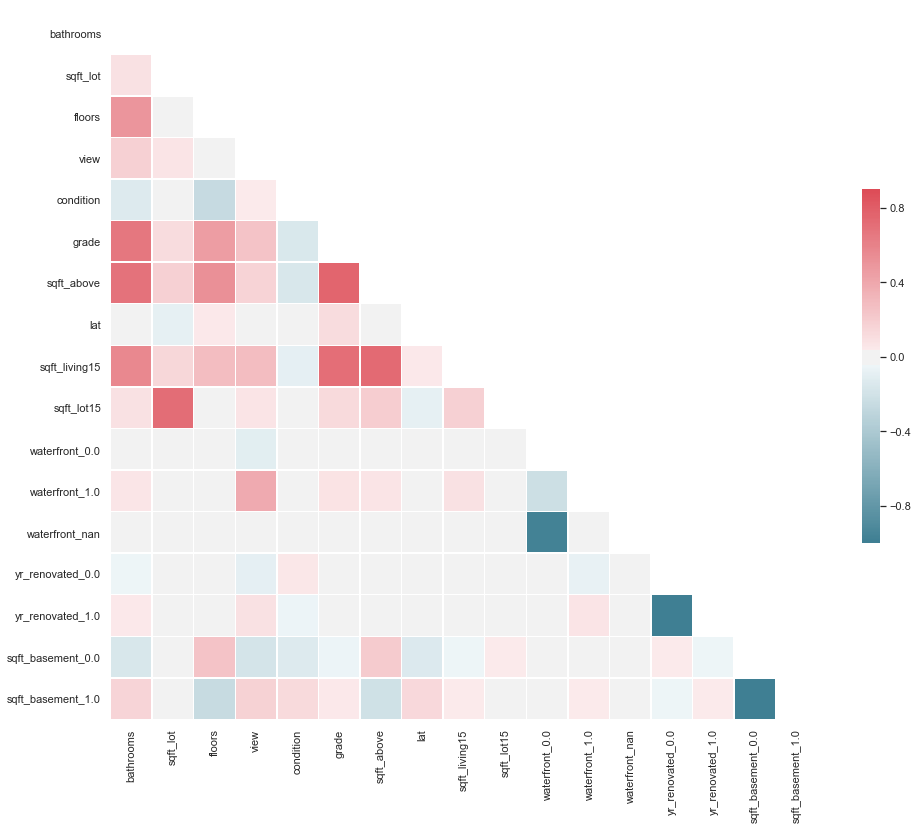

In [295]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = predictors.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [296]:
abs(corr) > .75

,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
bathrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


maybe we should only have 1 of sqft_lot15 and sqft_lot.  it makes sense that these might be correlated

In [298]:
df = df.drop('sqft_lot', axis=1)

In [300]:
predictors = predictors.drop('sqft_lot', axis=1)

In [301]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     3209.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:03:33   Log-Likelihood:                -19024.
No. Observations:               21597   AIC:                         3.808e+04
Df Residuals:                   21583   BIC:                         3.819e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.046e+09   4.37e+11     -0.007      0.994    -8.6e+11    8.54e+11
bathrooms             0.0181      0.007      2.778      0.005       0.005       0.031
floors               -0.0561      0.005    -10.350      0.000      -0.067      -0.045
view                  0.1534      0.005     33.572      0.000       0.144       0.162
condition             0.1121      0.004     26.985      0.000       0.104       0.120
grade                 0.2947      0.007     41.719      0.000       0.281       0.309
sqft_above            0.3836      0.008     45.526      0.000       0.367       0.400
lat                   0.2534      0.004     61.906      0.000       0.245       0.261
sqft_living15         0.0414      0.007      6.276      0.000       0.029       0.054
sqft_lot15           -0.0254      0.004     -6.175      0.000      -0.033      -0.017
waterfront_0.0    -9.346e+08   1.34e+11     -0.007      0.994   -2.64e+11    2.62e+11
waterfront_1.0    -9.346e+08   1.34e+11     -0.007      0.994   -2.64e+11    2.62e+11
waterfront_nan    -9.346e+08   1.34e+11     -0.007      0.994   -2.64e+11    2.62e+11
yr_renovated_0.0  -1.432e+09   2.05e+11     -0.007      0.994   -4.04e+11    4.01e+11
yr_renovated_1.0  -1.432e+09   2.05e+11     -0.007      0.994   -4.04e+11    4.01e+11
sqft_basement_0.0  5.413e+09   7.77e+11      0.007      0.994   -1.52e+12    1.53e+12
sqft_basement_1.0  5.413e+09   7.77e+11      0.007      0.994   -1.52e+12    1.53e+12
==============================================================================
Omnibus:                    19531.444   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2214375.255
Skew:                           3.921   Prob(JB):                         0.00
Kurtosis:                      51.982   Cond. No.                     1.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

the major stats did not improve but the categorical columns pvalues are messed up now.  don't know why

In [302]:
predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,-1.451039,-0.915531,-0.304942,-0.629972,-0.560787,-0.735234,-0.352886,-0.943654,-0.260621,0,0,1,1,0,1,0
1,0.174482,0.937409,-0.304942,-0.629972,-0.560787,0.460766,1.161349,-0.432877,-0.187695,1,0,0,0,1,0,1
2,-1.451039,-0.915531,-0.304942,-0.629972,-1.413157,-1.230546,1.283325,1.070267,-0.172186,1,0,0,1,0,1,0
3,1.149794,-0.915531,-0.304942,2.444371,-0.560787,-0.892284,-0.283598,-0.914467,-0.284453,1,0,0,1,0,0,1
4,-0.150622,-0.915531,-0.304942,-0.629972,0.291583,-0.131194,0.409284,-0.272347,-0.192682,1,0,0,1,0,1,0


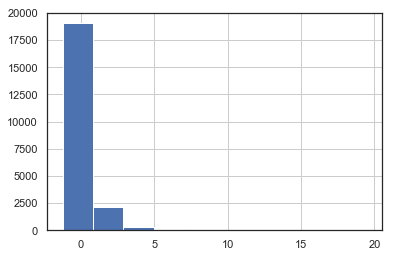

In [303]:
df.price.hist()

In [304]:
df.price.describe()

count    2.159700e+04
mean    -3.684807e-17
std      1.000000e+00
min     -1.258401e+00
25%     -5.942175e-01
50%     -2.457932e-01
75%      2.850095e-01
max      1.948918e+01
Name: price, dtype: float64

the target is very skewed, lets definitely take the log of that to see if that helps

In [305]:
df.price = np.log(df.price)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [306]:
df.price

0             NaN
1             NaN
2             NaN
3       -1.752126
4             NaN
5        0.629897
6             NaN
7             NaN
8             NaN
9             NaN
10      -1.100677
11            NaN
12            NaN
13            NaN
14            NaN
15      -1.208584
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21       1.379624
22            NaN
23            NaN
24            NaN
25            NaN
26       0.076825
27      -1.064515
28            NaN
29      -0.720637
           ...   
21567         NaN
21568         NaN
21569         NaN
21570         NaN
21571         NaN
21572         NaN
21573         NaN
21574    0.615292
21575   -2.449940
21576         NaN
21577    0.403014
21578         NaN
21579         NaN
21580   -0.967201
21581    1.040326
21582   -5.498618
21583   -0.309042
21584    1.001094
21585         NaN
21586         NaN
21587         NaN
21588         NaN
21589   -1.652336
21590    0.245737
21591     

oops, I think I was supposed to take the log before normalizing the data because you can't take the log of a negative number